In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from pandas import DataFrame
from matplotlib import style
import matplotlib.ticker as ticker
from math import sqrt

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import multiprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
%matplotlib inline

In [9]:
data= pd.read_csv("credit_one.csv")

In [10]:

data.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_group,default
0,1,1,20000,female,university,1,24,2,2,-1,...,0,0,689,0,0,0,0,default,20-30,True
1,2,2,120000,female,university,2,26,-1,2,0,...,3261,0,1000,1000,1000,0,2000,default,20-30,True
2,3,3,90000,female,university,2,34,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,not default,30-40,False
3,4,4,50000,female,university,1,37,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,not default,30-40,False
4,5,5,50000,male,university,1,57,-1,0,-1,...,19131,2000,36681,10000,9000,689,679,not default,50-60,False


In [11]:
data=data.iloc[:,2:28]
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_group,default
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,default,20-30,True
1,120000,female,university,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,default,20-30,True
2,90000,female,university,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,not default,30-40,False
3,50000,female,university,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,not default,30-40,False
4,50000,male,university,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,not default,50-60,False


In [12]:
data=data.drop("default payment next month",axis=1)
data=data.drop("age_group",axis=1)

In [13]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,True
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,True
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,False
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,False
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,False


In [14]:

df=data

 # PREPROCESO: TRABAJAR CON DUMMIES CON EL METODO GET-DUMMIES




In [15]:
lb=LabelEncoder()

In [16]:
df["SEX"]=lb.fit_transform(df["SEX"])
df.default=lb.fit_transform(df["default"])


In [17]:
df['MARRIAGE'] = df["MARRIAGE"].map({0:"other",1:"married",2:"single",3:"divorce"})

In [18]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,0,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,0,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [19]:

df1=pd.get_dummies(df.EDUCATION)
df2=pd.get_dummies(df.MARRIAGE)
df2

,divorce,married,other,single
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
30196,0,1,0,0
30197,0,0,0,1
30198,0,0,0,1
30199,0,1,0,0


In [20]:
df=df.drop({"PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","EDUCATION","MARRIAGE"},axis=1)
df

,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30196,220000,1,39,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
30197,150000,1,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
30198,30000,1,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
30199,80000,1,41,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [21]:
df=pd.concat([df,df1,df2],axis=1)
df

,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_AMT6,default,graduate school,high school,other,university,divorce,married,other,single
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,2000,1,0,0,0,1,0,0,0,1
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,5000,0,0,0,0,1,0,0,0,1
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,1000,0,0,0,0,1,0,1,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,679,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30196,220000,1,39,188948,192815,208365,88004,31237,15980,8500,...,1000,0,0,1,0,0,0,1,0,0
30197,150000,1,43,1683,1828,3502,8979,5190,0,1837,...,0,0,0,1,0,0,0,0,0,1
30198,30000,1,37,3565,3356,2758,20878,20582,19357,0,...,3100,1,0,0,0,1,0,0,0,1
30199,80000,1,41,-1645,78379,76304,52774,11855,48944,85900,...,1804,1,0,1,0,0,0,1,0,0


In [22]:
df=df.drop("other",axis=1)
df

,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,graduate school,high school,university,divorce,married,single
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,1000,0,2000,1,0,0,1,0,0,1
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,1000,1000,5000,0,0,0,1,0,0,1
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,1100,1069,1000,0,0,0,1,0,1,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,9000,689,679,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30196,220000,1,39,188948,192815,208365,88004,31237,15980,8500,...,3047,5000,1000,0,0,1,0,0,1,0
30197,150000,1,43,1683,1828,3502,8979,5190,0,1837,...,129,0,0,0,0,1,0,0,0,1
30198,30000,1,37,3565,3356,2758,20878,20582,19357,0,...,4200,2000,3100,1,0,0,1,0,0,1
30199,80000,1,41,-1645,78379,76304,52774,11855,48944,85900,...,1926,52964,1804,1,0,1,0,0,1,0


# ENTRENAMIENTO Y STANDAR SCALE (MODELO PARA DETERMINAR EL DEFAULT)

In [23]:
X=df.drop("default",axis=1)
y=df["default"]

In [24]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.20, random_state= 42)


In [25]:
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# VERIFICACION DE MODELOS


In [26]:
modelsR = []
modelsC=[]

In [27]:
modelsR.append(("Random Forest Regressor",RandomForestRegressor()))
modelsR.append(("Linear Regressor",LinearRegression()))
modelsR.append(("Support Vector Regressor",SVR()))
modelsC.append(("Random Forest Classifier",RandomForestClassifier()))
modelsC.append(("Gradient Boost", GradientBoostingClassifier()))
modelsC.append(("Neural Network",MLPClassifier()))
modelsC.append(("Decision Tree Classifier",DecisionTreeClassifier()))

In [28]:

results = []
names = []
for name, model in modelsR:
 result = cross_val_score(model, X,y, cv=3, scoring='r2')
 names.append(name)
 results.append(result)
for name, model in modelsC:
 result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
 names.append(name)
 results.append(result)



In [29]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.09304168622420368
Linear Regressor 0.03153626528763279
Support Vector Regressor -0.08529164900097334
Random Forest Classifier 0.7864971358564286
Gradient Boost 0.7886493824707791
Neural Network 0.6276613357173603
Decision Tree Classifier 0.6938180854938579


# GRADIENT BOST CLASSIFIER 


In [30]:
gbc= GradientBoostingClassifier(n_estimators=200, max_depth=6,max_features=7)
gbc.fit(X_train,y_train)
pred_gbc=gbc.predict(X_test)

In [31]:
pred_gbc[:20]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [32]:
print(classification_report(y_test,pred_gbc))
print(confusion_matrix(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      4701
           1       0.49      0.25      0.34      1340

    accuracy                           0.78      6041
   macro avg       0.65      0.59      0.60      6041
weighted avg       0.74      0.78      0.75      6041

[[4353  348]
 [1000  340]]


# RANDOM FOREST


In [33]:
gbc= RandomForestClassifier(n_estimators=400, max_depth=12)
gbc.fit(X_train,y_train)
pred_gbc=gbc.predict(X_test)

In [34]:
print(classification_report(y_test,pred_gbc))
print(confusion_matrix(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      4701
           1       0.58      0.17      0.26      1340

    accuracy                           0.79      6041
   macro avg       0.69      0.57      0.57      6041
weighted avg       0.75      0.79      0.74      6041

[[4537  164]
 [1113  227]]


# ENTRENAMIENTO Y STANDAR SCALE (MODELO DE REGRESSION PARA CALCULAR EL LIMITE DE CREDITOT)

In [35]:
X=df.drop("LIMIT_BAL",axis=1)
y=df["LIMIT_BAL"]


In [36]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.20, random_state= 42)
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# VERIFICACION DE MODELOS

In [37]:
modelsR = []
modelsC=[]
modelsR.append(("Random Forest Regressor",RandomForestRegressor()))
modelsR.append(("Linear Regressor",LinearRegression()))
modelsR.append(("Support Vector Regressor",SVR()))


In [38]:

results = []
names = []
for name, model in modelsR:
 result = cross_val_score(model, X,y, cv=3, scoring='r2')
 names.append(name)
 results.append(result)



In [39]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.46121636952648304
Linear Regressor 0.26486585615262
Support Vector Regressor -0.05077551894230218


# PREPROCESO PARA MEJORAR EL MODELO

In [40]:
df1=df[df.LIMIT_BAL<780000]


In [41]:

df1

,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,graduate school,high school,university,divorce,married,single
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,1000,0,2000,1,0,0,1,0,0,1
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,1000,1000,5000,0,0,0,1,0,0,1
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,1100,1069,1000,0,0,0,1,0,1,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,9000,689,679,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30196,220000,1,39,188948,192815,208365,88004,31237,15980,8500,...,3047,5000,1000,0,0,1,0,0,1,0
30197,150000,1,43,1683,1828,3502,8979,5190,0,1837,...,129,0,0,0,0,1,0,0,0,1
30198,30000,1,37,3565,3356,2758,20878,20582,19357,0,...,4200,2000,3100,1,0,0,1,0,0,1
30199,80000,1,41,-1645,78379,76304,52774,11855,48944,85900,...,1926,52964,1804,1,0,1,0,0,1,0


In [42]:
X=df1.drop("LIMIT_BAL",axis=1)
y=df1["LIMIT_BAL"]


In [43]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.20, random_state= 42)
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X,y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 9.994 10.78  57.249 55.848 57.3   59.678 61.767 62.146 20.775 18.979
 22.488 27.971 30.57  25.097 13.592 33.864 11.027 11.399  2.068  6.545
  5.316]
[[  689     0     0     0]
 [ 2682  3272  3455  3261]
 [13559 14331 14948 15549]
 [49291 28314 28959 29547]
 [35835 20940 19146 19131]]


In [45]:
from sklearn.feature_selection import RFE

# feature extraction
model = RandomForestRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\Pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Num Features: 3
Selected Features: [False False  True False  True False False False False  True False False
 False False False False False False False False False]
Feature Ranking: [13  4  1  7  1  9  6 10  5  1  3 11  8  2 14 12 16 18 19 15 17]


In [46]:
modelsR = []
modelsC=[]
modelsR.append(("Random Forest Regressor",RandomForestRegressor()))
modelsR.append(('LASSO',Lasso()))
modelsR.append(('EN', ElasticNet()))
modelsR.append(('KNN', KNeighborsRegressor()))
modelsR.append(('CART', DecisionTreeRegressor()))
modelsR.append(('GBM', GradientBoostingRegressor()))



In [47]:

results = []
names = []
for name, model in modelsR:
 result = cross_val_score(model, X,y, cv=3, scoring='r2')
 names.append(name)
 results.append(result)


C:\Users\Pc\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89284692273615.92, tolerance: 33628805914.466816
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pc\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22255435052628.156, tolerance: 33261183343.211727
  model = cd_fast.enet_coordinate_descent(


In [48]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.46077392080373275
LASSO 0.2629847119577216
EN 0.22080857738000503
KNN 0.3156602211528916
CART -0.07906181125391971
GBM 0.46552536773061365


In [49]:
rfr= RandomForestRegressor(n_jobs=10)
rfr.fit(X_train,y_train)
pred_rfr=rfr.predict(X_test)

In [50]:

predRsquared = r2_score(y_test,pred_rfr)
rmse = sqrt(mean_squared_error(y_test, pred_rfr))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.463
RMSE: 94452.240


In [58]:

gbr= GradientBoostingRegressor(n_estimators=200,subsample=0.8,max_depth=7)
gbr.fit(X_train,y_train)
predgbr=gbr.predict(X_test)

In [52]:
predRsquared = r2_score(y_test,pred_gbr)
rmse = sqrt(mean_squared_error(y_test, pred_gbr))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.464
RMSE: 94393.817


ValueError: 'c' argument has 2 elements, which is inconsistent with 'x' and 'y' with size 6040.

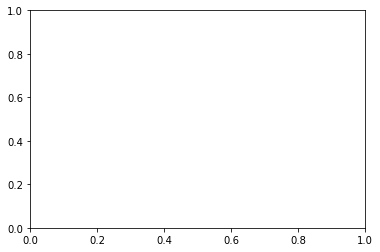

In [63]:
plt.scatter(y_test, predgbr,color=["green","blue"], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();